<a href="https://www.kaggle.com/code/risakashiwabara/eda-seaborn-heatmap-matplotlib-bar?scriptVersionId=155445937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/k4pHf0RP/publicdomainq-0073773.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/k4pHf0RP/publicdomainq-0073773.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Sample data acquisition　</p>

In [2]:
data_bedtime = pd.read_csv('/kaggle/input/japanquality-of-sleep/bedtime.csv')
data_bedtime

,sex,time,terms,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other
0,man,Less than 8 hours,sweets,568,448,134,39,11
1,man,8 hours,sweets,2465,2303,523,136,42
2,man,9 hours,sweets,1857,1805,411,148,27
3,man,10 hours,sweets,91,91,27,4,2
4,man,More than 11 hours,sweets,1,3,0,0,0
...,...,...,...,...,...,...,...,...
79,woman,9 hours,"Rice, bread, noodles",522,783,786,1238,45
80,woman,10 hours,"Rice, bread, noodles",27,37,40,52,4
81,woman,More than 11 hours,"Rice, bread, noodles",0,0,0,0,0
82,woman,irregularity,"Rice, bread, noodles",57,71,53,70,2


In [3]:
df = data_bedtime.assign(total  = data_bedtime[['Eat well Drink well','Sometimes eat Sometimes drink','Hardly eat or drink','Not eating or drinking at all','Other']].sum(axis=1))
df

,sex,time,terms,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other,total
0,man,Less than 8 hours,sweets,568,448,134,39,11,1200
1,man,8 hours,sweets,2465,2303,523,136,42,5469
2,man,9 hours,sweets,1857,1805,411,148,27,4248
3,man,10 hours,sweets,91,91,27,4,2,215
4,man,More than 11 hours,sweets,1,3,0,0,0,4
...,...,...,...,...,...,...,...,...,...
79,woman,9 hours,"Rice, bread, noodles",522,783,786,1238,45,3374
80,woman,10 hours,"Rice, bread, noodles",27,37,40,52,4,160
81,woman,More than 11 hours,"Rice, bread, noodles",0,0,0,0,0,0
82,woman,irregularity,"Rice, bread, noodles",57,71,53,70,2,253


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/k4pHf0RP/publicdomainq-0073773.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> -Details-　</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   sex                            84 non-null     object
 1   time                           84 non-null     object
 2   terms                          84 non-null     object
 3   Eat well Drink well            84 non-null     int64 
 4   Sometimes eat Sometimes drink  84 non-null     int64 
 5   Hardly eat or drink            84 non-null     int64 
 6   Not eating or drinking at all  84 non-null     int64 
 7   Other                          84 non-null     int64 
 8   total                          84 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sex', 'time', 'terms', 'Eat well Drink well',
       'Sometimes eat Sometimes drink', 'Hardly eat or drink',
       'Not eating or drinking at all', 'Other', 'total'],
      dtype='object')

In [6]:
df.describe()

,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other,total
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,406.714286,612.321429,317.333333,225.071429,29.845238,1591.285714
std,611.588876,818.766515,441.146134,392.901434,30.311433,2014.415163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,17.000000,7.000000,4.750000,3.750000,116.000000
50%,71.000000,88.000000,52.500000,40.000000,17.000000,234.000000
75%,562.750000,1195.750000,451.000000,243.750000,53.250000,3374.000000
max,2760.000000,2809.000000,1493.000000,1653.000000,91.000000,5469.000000


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/k4pHf0RP/publicdomainq-0073773.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> -heatmap-　</p>

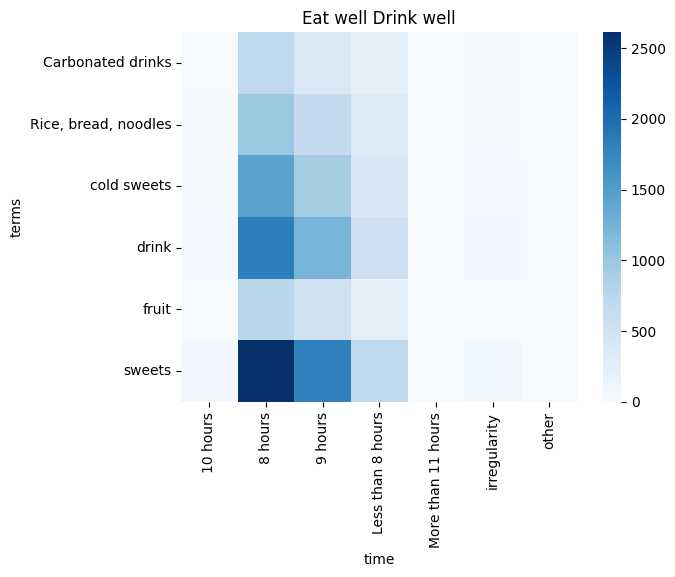

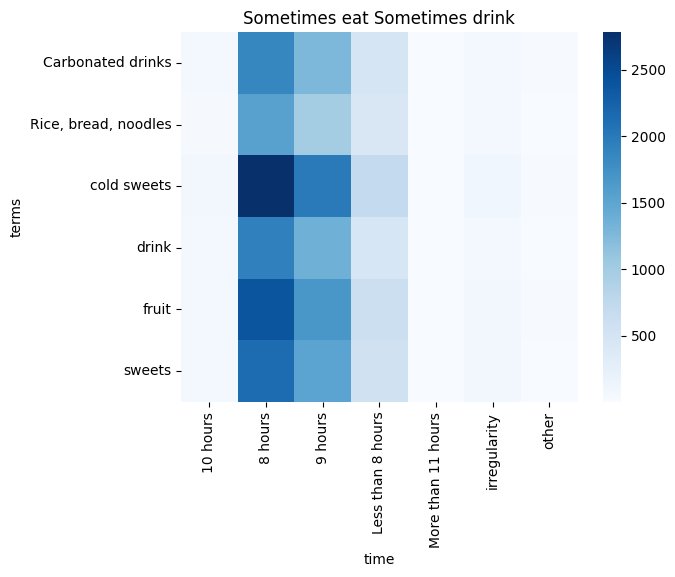

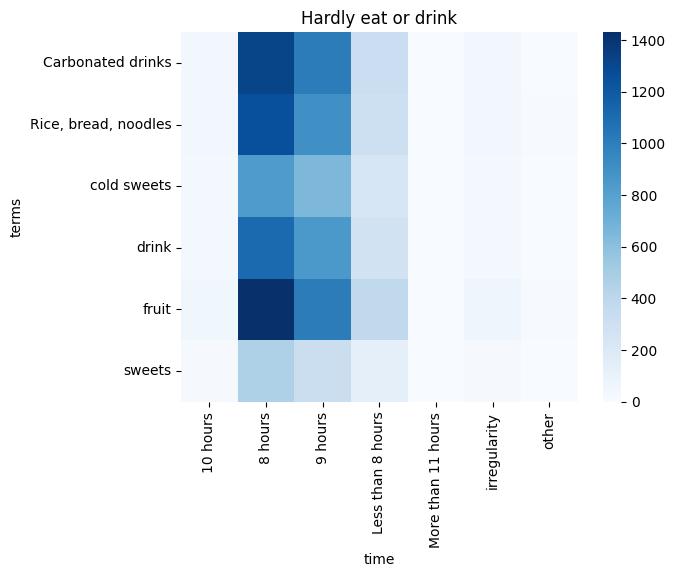

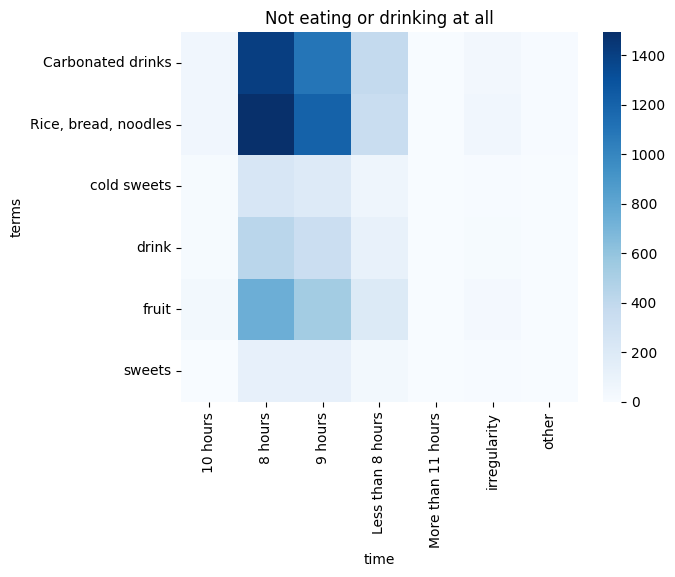

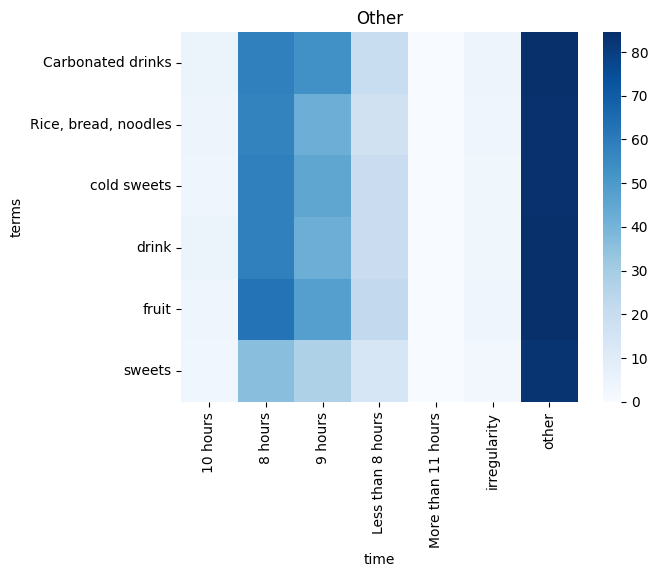

<Figure size 640x480 with 0 Axes>

In [7]:

columns = ['Eat well Drink well','Sometimes eat Sometimes drink','Hardly eat or drink','Not eating or drinking at all','Other']
for i in columns:
    flights = pd.pivot_table(df, index='terms', columns='time', values=i)
    df_list = []
    df_flights = pd.DataFrame(flights)
    df_list.append(df_flights)    
    for df_c in df_list:  
            ax = sns.heatmap(df_c,cmap='Blues')
            ax.set_title(i)
            plt.figure()
        


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/k4pHf0RP/publicdomainq-0073773.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> -bergraph-　</p>

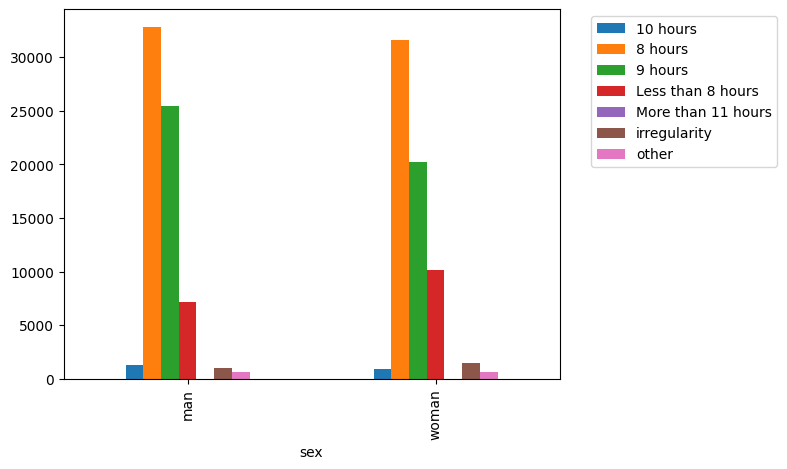

In [8]:
ber_df = pd.pivot_table(df, index='sex', columns='time', values='total', aggfunc=np.sum)
ber_df.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()